In [23]:
%matplotlib inline

import numpy
from matplotlib import pyplot
from datetime import datetime
import warnings

warnings.filterwarnings("ignore", module="numpy")

fname = '/mnt/storage/data/2016-11-11_17:52:59/in/temperature/temperaturehistory'
col_names = ('dt','ms',
             'ctrld_meas','ctrld_set','ctrl_out',
             'intensity','ttube','tsurf',
             'setv','setf','setq',
             'outv','outf','outq',
             'measv','measf','measq',
             'tamb')
col_dtypes = (datetime,float,
              None,float,float,
              float,float,float,
              float,float,float,
              float,float,float,
              float,float,float,
              float)

convertfunc = lambda s: float(s)*(1./1000.)
convertfunc_setv = lambda s: float(s)*(1./10.)
convertfunc_setf = lambda s: float(s)*(1./24.)
convertfunc_setq = lambda s: float(s)*(1./10.)

data = numpy.genfromtxt(fname,delimiter=',',
                        dtype=col_dtypes,names=col_names,invalid_raise=False,
                        usecols=(i for i in range(1,18)),
                        converters = {'ms': convertfunc, 
                                      'setv': convertfunc_setv, 
                                      'setf': convertfunc_setf,
                                      'setq': convertfunc_setq
                                     })
print(data['ms'][:10])

[ 241.215  241.215  241.215  241.215  241.277  241.34   241.402  241.465
  241.527  241.59 ]


/home/brandon/.virtualenvs/sci3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


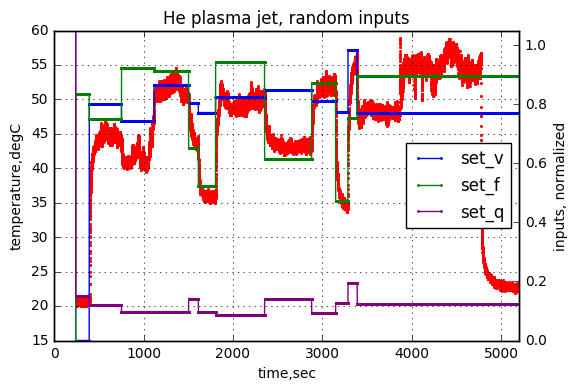

In [31]:
fig = pyplot.figure()
ax = fig.add_subplot('111')

ax.plot(data['ms'],data['tsurf'],color='red',
        linestyle='None',marker='o',markeredgewidth=0,markersize=2,label='temperature')

ax2 = ax.twinx()

ax2.plot(data['ms'],data['setv'],color='blue',
        linestyle='-',marker='o',markeredgewidth=0,markersize=2,label='set_v')
ax2.plot(data['ms'],data['setf'],color='green',
        linestyle='-',marker='o',markeredgewidth=0,markersize=2,label='set_f')
ax2.plot(data['ms'],data['setq'],color='purple',
        linestyle='-',marker='o',markeredgewidth=0,markersize=2,label='set_q')

# ax2.plot(data['ms'],data['intensity'],color='blue',
#         linestyle='None',marker='o',markeredgewidth=0,markersize=2,label='brightness')

ax.set_xlim([0,5200])
#ax.set_ylim([0,30])
ax2.set_ylim([0,1.05])
ax.grid()
#ax.legend()
ax.set_ylabel('temperature,degC')
# ax2.set_ylabel('brightness,arb')
ax2.set_ylabel('inputs, normalized')
ax.set_xlabel('time,sec')
ax.set_title('He plasma jet, random inputs')
ax2.legend(loc=0)

#ax.axvline(93,0,250,color='black', linewidth=3, linestyle='--')
#ax.axvline(110,0,250,color='black', linewidth=3, linestyle='--')

fig.show()
#fig.savefig('optim-out-temp-01.png',dpi=300)

/home/brandon/.virtualenvs/sci3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


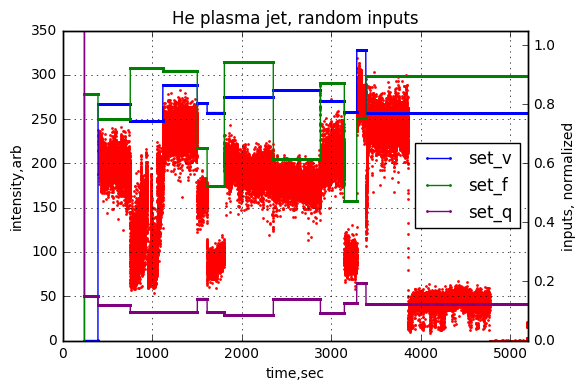

In [28]:
fig = pyplot.figure()
ax = fig.add_subplot('111')

ax.plot(data['ms'],data['intensity'],color='red',
        linestyle='None',marker='o',markeredgewidth=0,markersize=2,label='intensity')

ax2 = ax.twinx()

ax2.plot(data['ms'],data['setv'],color='blue',
        linestyle='-',marker='o',markeredgewidth=0,markersize=2,label='set_v')
ax2.plot(data['ms'],data['setf'],color='green',
        linestyle='-',marker='o',markeredgewidth=0,markersize=2,label='set_f')
ax2.plot(data['ms'],data['setq'],color='purple',
        linestyle='-',marker='o',markeredgewidth=0,markersize=2,label='set_q')

# ax2.plot(data['ms'],data['intensity'],color='blue',
#         linestyle='None',marker='o',markeredgewidth=0,markersize=2,label='brightness')

ax.set_xlim([0,5200])
#ax.set_ylim([0,30])
ax2.set_ylim([0,1.05])
ax.grid()
#ax.legend()
#ax.set_ylabel('temperature,degC')
ax.set_ylabel('intensity,arb')
ax2.set_ylabel('inputs, normalized')
ax.set_xlabel('time,sec')
ax.set_title('He plasma jet, random inputs')
ax2.legend(loc=0)

#ax.axvline(93,0,250,color='black', linewidth=3, linestyle='--')
#ax.axvline(110,0,250,color='black', linewidth=3, linestyle='--')

fig.show()
fig.savefig('optim-out-int-01.png',dpi=300)